In [11]:
!pip install fastai
!pip install -U duckduckgo_search
from duckduckgo_search import ddg_images
from fastcore.all import *


In [29]:
def search_images(term, max_images=30):
    results = ddg_images(term, max_results=max_images)
    urls = [item['image'] for item in results if 'image' in item]
    return urls

urls = search_images('lion photo', max_images=1)
print(urls[0] if urls else "No URLs found")

https://i.pinimg.com/originals/e6/19/a4/e619a4eb8af0a0bef8e9316c4bbe5f61.jpg


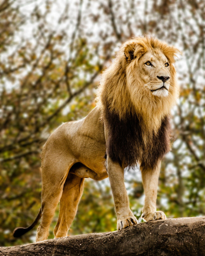

In [30]:
from fastdownload import download_url
dest = 'lion.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

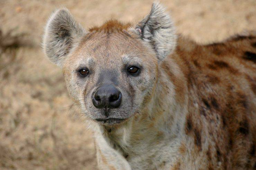

In [31]:
download_url(search_images('iena  photos', max_images=1)[0], 'iena.jpg', show_progress=False)
Image.open('iena.jpg').to_thumb(256,256)

In [32]:
searches = 'lion','iena'
path = Path('lion_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'  {o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f' {o} shade  photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [33]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

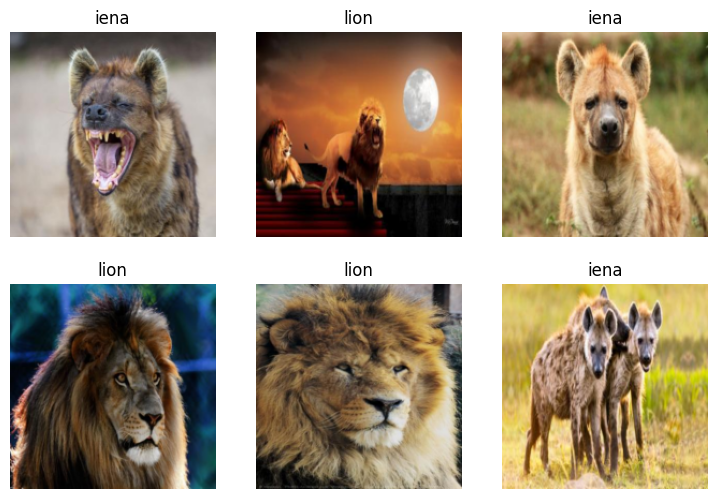

In [34]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [38]:
learn = vision_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.652532,0.174322,0.893939,00:01


epoch,train_loss,valid_loss,accuracy,time
0,0.060341,0.040955,0.969697,00:01
1,0.031823,0.029445,0.969697,00:01
2,0.019930,0.020163,1.000000,00:03


In [39]:
prediction = learn.predict(PILImage.create('lion.jpg'))
prediction
#print(f"This is a: {is_lion}.")
#print(f"Probability it's a lion: {probs[0]:.4f}")

('lion', tensor(1), tensor([3.9386e-06, 1.0000e+00]))